In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import gzip

In [2]:
print('Give the overview of the fits files\n')
cx_fits=fits.open('acisf03727N004_evt2.fits')
cx_fits.info()
events=cx_fits['EVENTS'].data
print('\n Give the names of columns in the events table\n')
print(cx_fits['EVENTS'].data.names)
print('\nGive detais of the header file')
cx_fits[0].header

Give the overview of the fits files

Filename: acisf03727N004_evt2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  EVENTS        1 BinTableHDU    991   1805804R x 26C   [1D, 1J, 1E, 1E, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 1I, 1J, 1I, 1E, 1I, 1I, 1I, 1I, 1E, 1E, 1I, 1I, 1I, 32X]   
  2  GTI           7 BinTableHDU     28   1R x 2C   [1D, 1D]   
  3  REGION        1 BinTableHDU    280   3R x 9C   [1I, 16A, 1E, 1E, 2E, 1E, 16A, 1I, 1I]   

 Give the names of columns in the events table

['time', 'expno', 'tg_r', 'tg_d', 'chipx', 'chipy', 'tdetx', 'tdety', 'detx', 'dety', 'x', 'y', 'ccd_id', 'pha', 'pi', 'energy', 'grade', 'fltgrade', 'node_id', 'tg_m', 'tg_lam', 'tg_mlam', 'tg_srcid', 'tg_part', 'tg_smap', 'status']

Give detais of the header file


SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
HDUNAME = 'PRIMARY '                                                            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'ASC     '           / Source of FITS file                            
CREATOR = 'cxc - Version DS10.9' / tool that created this output                
CHECKSUM= 'ZA64c861ZA61b561'   / HDU checksum updated 2021-04-01T12:25:05       
DATASUM = '        '        

In [3]:
def x_y_plotter(events):
    #this function plots the spatial distribution of coordinates of the x and y
    #bascially where the event was in the sky like ra,dec thing
    #x and y are pixel units of the detector
    x= events['x']
    y= events['y']
    
    #Hence first define bin_size for giving details
    #more the bin the lesser resolved the image
    bin_size=1
    
    #Find the highest rounded int vals in x and y and hence define the sizes for x and y axis
    image_x_size=int(np.ceil(np.max(x)/bin_size))
    image_y_size=int(np.ceil(np.max(y)/bin_size))
    #make a empty image array of the x_size and y_size
    image=np.zeros((image_y_size, image_x_size))
    
    #now we need to fill the array according to position of the source in x and y hences
    #obtaine the indices of the array where there is a detection
    x_indices= np.floor(x/bin_size).astype(int)
    y_indices= np.floor(y/bin_size).astype(int)
    
    #afterwards fill the indices in the image array in positions where there is a detection as 1 
    #any arbitary val by doing += 1 operation
    image[y_indices, x_indices]+=1
    
    # Display the reconstructed image
    plt.imshow(image
               ,origin='lower', cmap='viridis')
    plt.colorbar()
    plt.title("Spatial distribution of pixels on detector plane")
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.show()


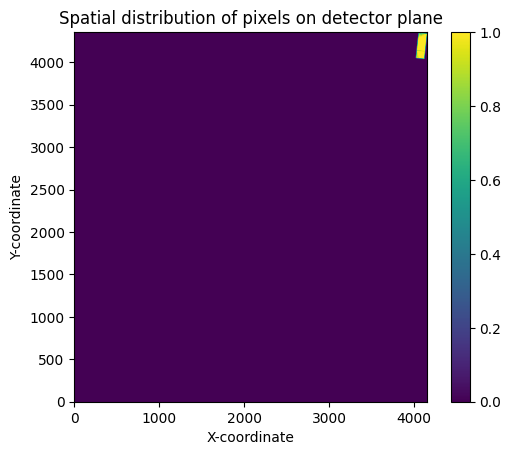

In [4]:
x_y_plotter(events)

In [5]:
def energy_time_hist(events, energy_bin, time_bin):
    energy=events['energy']
    time=events['time']

    plt.title('Energy Time distribution')
    plt.xlabel('Time in hrs')
    plt.ylabel('Energy in kev')
    plt.hist2d(np.max(time)/3600-time/3600,energy/1000,
               bins=[energy_bin,time_bin])

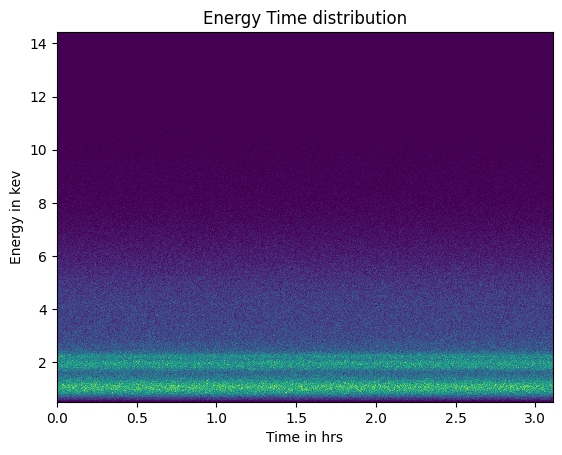

In [6]:
energy_time_hist(events, 500, 500)

In [7]:
def energy_hist(events, energy_min, energy_max):
    energy=events['energy']/1000 #convert the ev to kev 
    # Filter the energy values within the specified range
    energy_range = energy[(energy >= energy_min) & (energy <= energy_max)]
    plt.title('Energy distribution')
    plt.xlabel('Energy in kev')
    plt.ylabel('Counts')
    plt.hist(energy_range, bins=500)
    

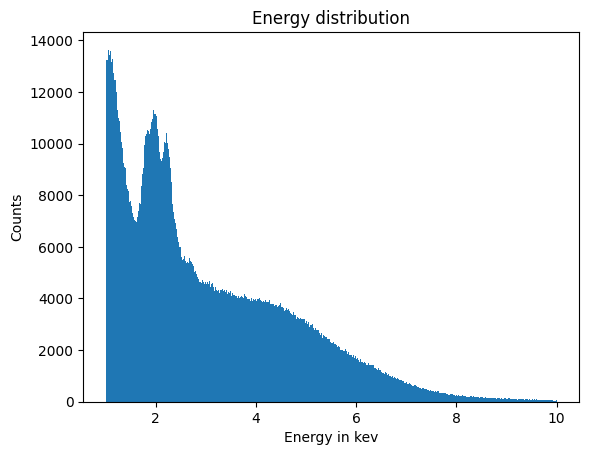

In [8]:
energy_hist(events, 1.0, 10.0)


In [9]:
def energy_spectrum(events, min_ener, max_ener):
    energy=events['energy'] #it is in ev 
    energy_min = min_ener*1000 #0.0  # Minimum energy in eV
    energy_max = max_ener*1000  # Maximum energy in eV
    selected_events = events[(energy >= energy_min) & (energy <= energy_max)]
    spectrum, _ = np.histogram(selected_events['ENERGY'], bins=100, range=(energy_min, energy_max))
    energy_bins = np.linspace(energy_min, energy_max, num=101)[:-1] + 0.5 * (energy_max - energy_min) / 100
    plt.figure(figsize=(8, 5))
    plt.plot(energy_bins/1000, spectrum, color='black')
    plt.xlabel('Energy (keV)')
    plt.ylabel('Counts')
    plt.title('X-ray Spectrum')
    plt.show()

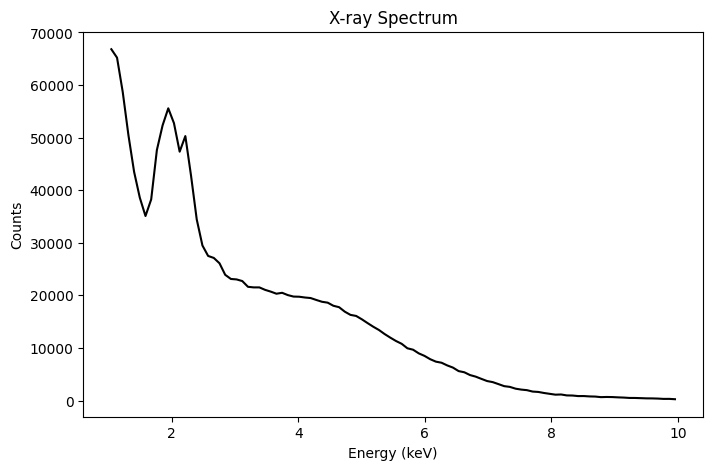

In [10]:
energy_spectrum(events, 1.0,10.0)

In [12]:
        
input_gz = '769/primary/acisf00769N006_cntr_img2.fits.gz'
output_fits = '769/primary/acisf00769N006_cntr_img2.fits'

with gzip.open(input_gz, 'rb') as f_in:
    with open(output_fits, 'wb') as f_out:
        f_out.write(f_in.read())

img_fits=fits.open(output_fits)
print(img_fits.info())
img=img_fits[0].data

Filename: 769/primary/acisf00769N006_cntr_img2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     793   (1025, 1024)   int32   
  1  GTI           7 BinTableHDU     28   3415R x 2C   [1D, 1D]   
None


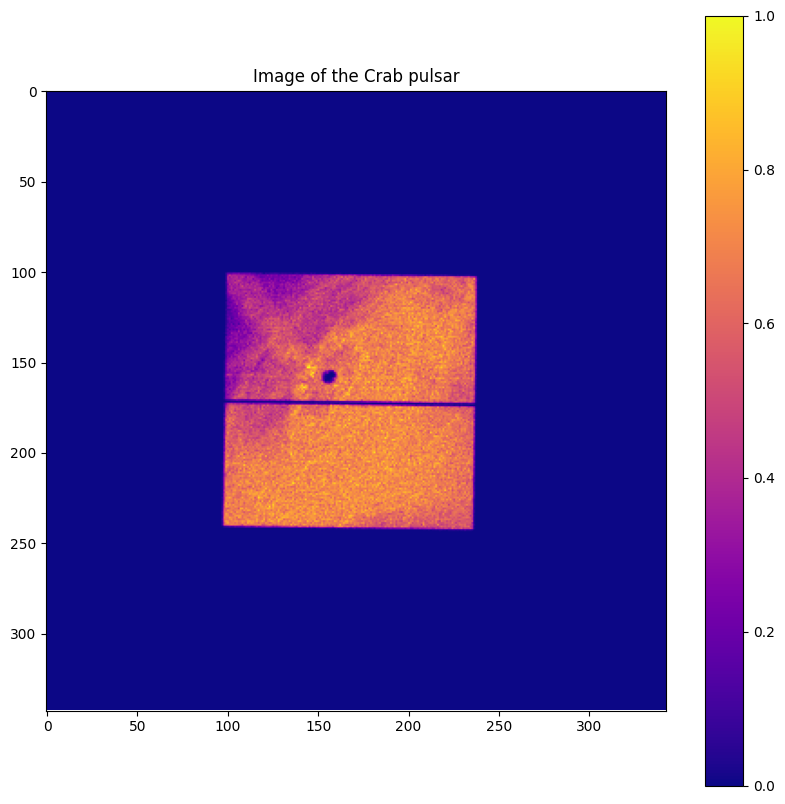

In [46]:
intensity_distribution = np.mean(img, axis=1)
minvalue=np.min(np.where(intensity_distribution>0)[0]) - 100
maxvalue=np.max(np.where(intensity_distribution>0)[0])+ 100
plt.figure(figsize=(10,10))
plt.imshow(img[minvalue:maxvalue,minvalue:maxvalue],cmap='plasma')
plt.title('Image of the Crab pulsar')
plt.colorbar()

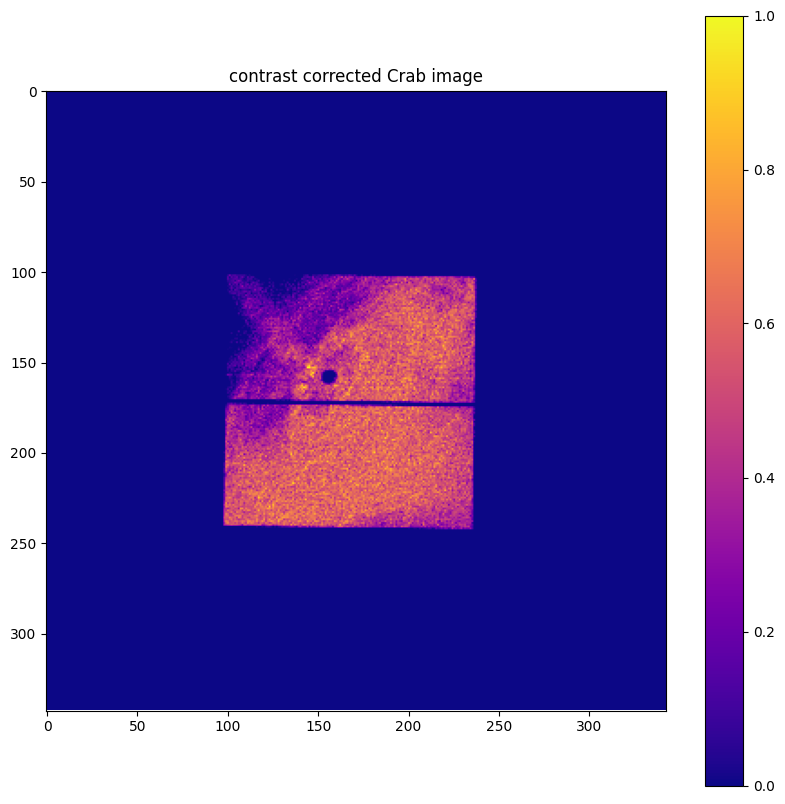

In [60]:
# Step 1: Normalize the data to a range between 0 and 1
img = img.astype(float)  # Convert to floating-point for accurate calculations
img = (img - np.min(img)) / (np.max(img) - np.min(img))

# Step 2: Define the contrast stretch parameters
contrast_min = 0.3 # Lower bound of the desired contrast range (adjust this value)
contrast_max = 1.0  # Upper bound of the desired contrast range (adjust this value)

# Step 3: Apply the contrast stretch
contrast_stretched_image = (img - contrast_min) / (contrast_max - contrast_min)
contrast_stretched_image = np.clip(contrast_stretched_image, 0.0, 1.0)  # Ensure values are within the valid range
plt.figure(figsize=(10,10))
plt.title('contrast corrected Crab image')
plt.imshow(contrast_stretched_image[minvalue:maxvalue,minvalue:maxvalue],cmap='plasma')
plt.colorbar()